In [2]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.casedeck import*
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *
# from hermes3.balance1d import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


In [3]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m4ab-tune_albedo_new_branch', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/grids')

case = db.load_case_2D("m4ab-tune_albedo_new_branch", use_squash = True, verbose = True)



- Reading case m4ab-tune_albedo_new_branch
-----------------------
- Looking for squash file
- Squash file found. squash date 01/12/2025, 17:02:45, dmp file date 01/12/2025, 16:40:35

Unnormalising with xHermes


In [ ]:
case.ds["da"] = case.ds['dx'] * case.ds['dz'] * case.ds['J'] / np.sqrt(case.ds['g_22'])


J = case.ds["J"]    
g_22 = case.ds["g_22"] 
dx = case.ds["dx"]    

# para face area
A_parallel = J * (g_22**0.5) * dx

case.ds["A_parallel"] = A_parallel


print(A_parallel.values)


[[   65.19884186    85.65206562   111.93754751 ...  8883.50426825
   3742.19149931  1407.7796588 ]
 [   66.33182874    87.20305705   114.08094602 ...  8721.3490061
   3663.84576401  1375.56502086]
 [   67.48764891    88.78003228   116.25413414 ...  8562.88853823
   3587.48912418  1344.23662055]
 ...
 [  297.52631553   390.39707103   511.05394529 ... 31773.81613246
  10989.93219182  3676.1148341 ]
 [  332.02394612   430.46088925   558.18816184 ... 34034.23302664
  11520.64347133  3814.42070186]
 [  377.36046105   477.36932528   611.99549479 ... 35576.6421205
  11832.81746065  3889.26511943]]


In [5]:
print(case.ds['efd+_tot_ylow'])

<xarray.DataArray 'efd+_tot_ylow' (t: 6, x: 40, theta: 108)>
dask.array<getitem, shape=(6, 40, 108), dtype=float64, chunksize=(6, 40, 108), chunktype=numpy.ndarray>
Coordinates: (12/24)
    dx                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    zShift                   (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
  * t                        (t) float64 4.787e+07 4.787e+07 ... 4.791e+07
    psi_poloidal             (x, theta) float64 -0.001427 -0.001427 ... 0.00634
    ...                       ...
    Zxy_upper_left_corners   (x, theta) float64 -1.287 -1.279 ... -1.723 -1.725
    Zxy_upper_right_corners  (x, theta) float64 -1.286 -1.277 ... -1.696 -1.698
  * x                        (x) int64 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 

1 None


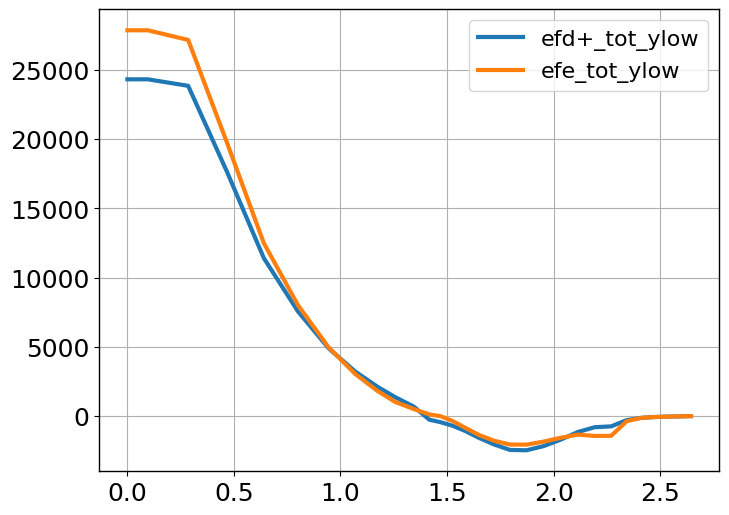

In [6]:

params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 'efd+_tot_xlow','efe_tot_xlow']
profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1)



q_par_e = -1* profile['kappa_par_e']*np.gradient(profile['Te'])

fig,ax = plt.subplots(1,1, figsize = (8,6))
ax.plot(profile['Spol'], profile['efd+_tot_xlow'], label = 'efd+_tot_ylow', linewidth = linewidth)
ax.plot(profile['Spol'], profile['efe_tot_xlow'], label = 'efe_tot_ylow', linewidth = linewidth)
# ax.plot(profile['Spol'], q_par_e, label = 'q_par_e', linewidth = linewidth)
ax.legend()